<a href="https://colab.research.google.com/github/athu-lya/case_study_athulya/blob/main/Exit_exam_Athulya_k_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXIT EXAM**

Using the provided dataset, perform a machine learning classification task to predict whether a player will be selected (1) or not selected (0) based on their attributes.

* Do EDA, preprocessing, modeling and fine tuning on the dataset
* Give detailed description for each step
* Upload the .ipynb file in GitHub repository as public
* Make sure that output of all cells is visible before uploading in GitHub.
* Share the repository link in Paatshala.


IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

**Loading the Dataset**

In [ ]:
data=pd.read_csv('/content/train_exit.csv')

In [ ]:
data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [ ]:
#Basic informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

*Dataset has 30 features and 13994 entries. Among that, 21 features are numerical (19 float and 2 integer) and 9 are categorical features.*

**EDA**

In [ ]:
#statistical summary
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [ ]:
#unique values
data.nunique()

player_id                    13994
name                         13994
age                             39
gender                           2
country                        163
height                          31
weight                          88
ball_controlling_skills         89
body_reflexes                   84
body_balance                    86
jumping_skills                  74
penalties_conversion_rate       86
mental_strength                 83
goalkeeping_skills              65
defending_skills                78
passing_skills                  77
dribbling_skills                48
shot_accuracy                   79
body_strength_stamina           73
max_running_speed              166
strong_foot                      3
behaviour_rating                64
matches_played                  18
fitness_rating                  85
trophies_won                    10
dedication_level                 3
coaching                         4
years_of_experience             25
no_of_disqualificati

*features'player_id'and 'name' have full of unique values*

In [ ]:
#checking duplicates
data.duplicated().sum()

0

There is no duplicates

In [ ]:
data.isnull().sum().sort_values(ascending=False)

strong_foot                  1833
behaviour_rating              703
fitness_rating                695
matches_played                666
shot_accuracy                 572
weight                        417
ball_controlling_skills       413
years_of_experience           144
coaching                      125
penalties_conversion_rate      30
mental_strength                28
jumping_skills                 24
gender                         19
player_id                       0
max_running_speed               0
dedication_level                0
no_of_disqualifications         0
trophies_won                    0
passing_skills                  0
body_strength_stamina           0
dribbling_skills                0
name                            0
defending_skills                0
goalkeeping_skills              0
body_balance                    0
body_reflexes                   0
height                          0
country                         0
age                             0
selection     

*13 features out of 30 have null values*

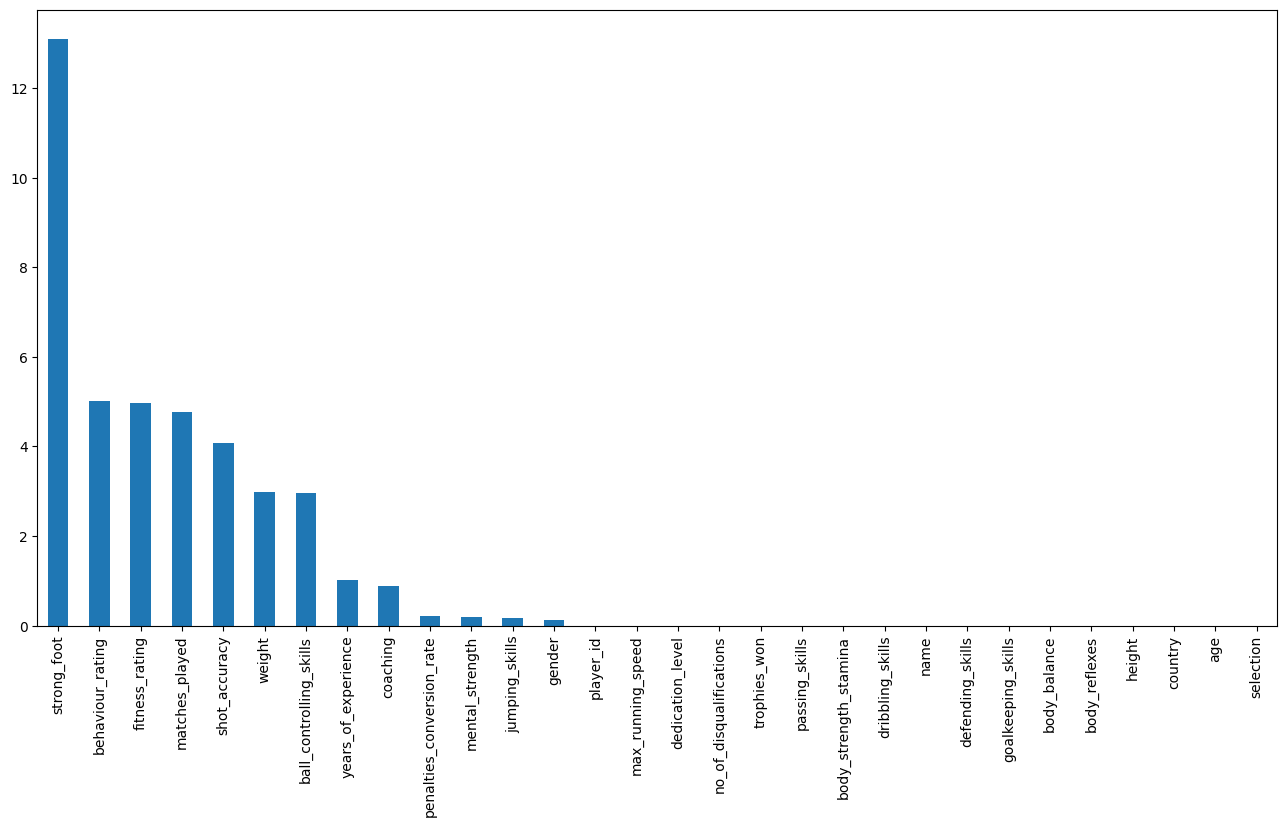

In [ ]:
plt.figure(figsize=(16, 8))
(((data.isnull().sum()/len(data))*100).sort_values(ascending=False)).plot(kind='bar')
plt.show()

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

In [ ]:
print(data.isnull().sum())

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64


null values imputed properly

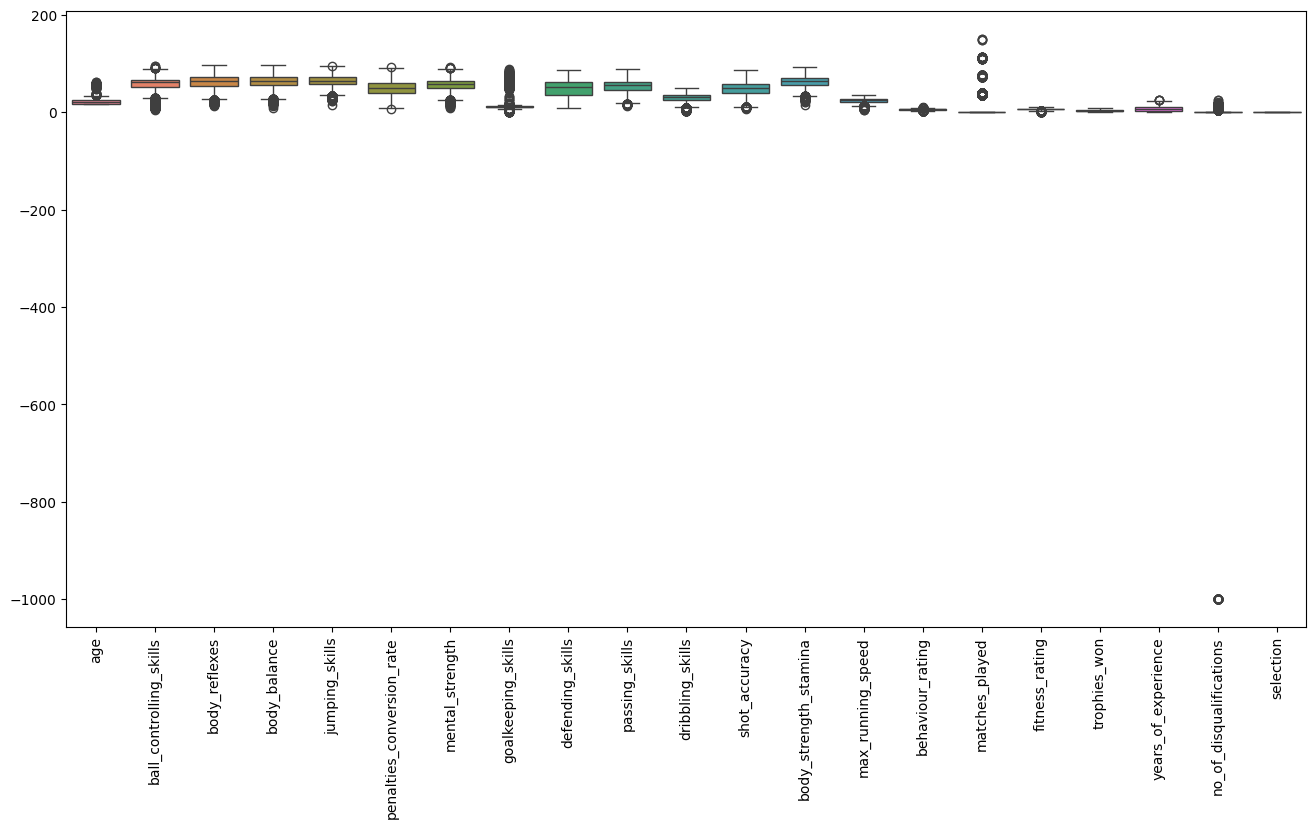

In [ ]:
#checking outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

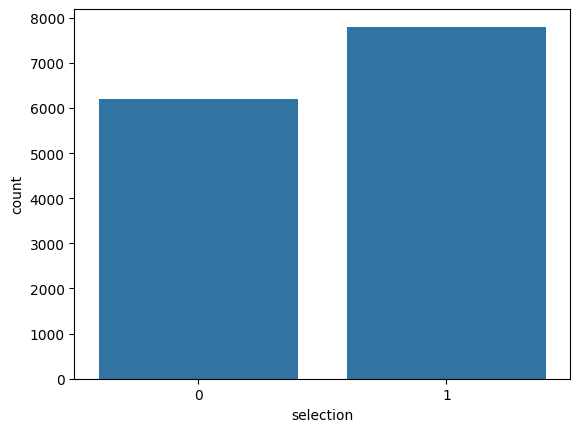

In [ ]:
sns.countplot(x='selection', data=data)
plt.show()

target variable is imbalanced

In [ ]:
#Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:
# Convert 'gender' column to numeric representation
data['gender_encoded'] = data['gender'].map({'M': 0, 'F': 1})
# Assuming 'M' and 'F' are the only values

In [ ]:
# Drop the original 'gender' column if needed
data = data.drop('gender', axis=1)

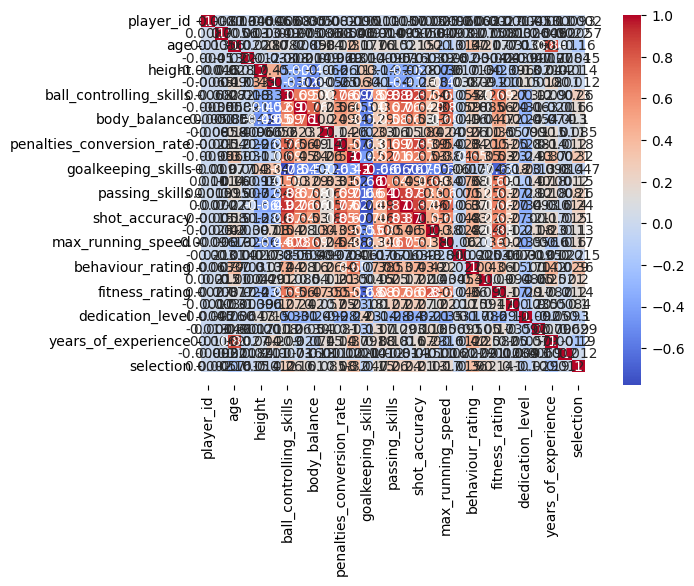

In [ ]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])

# Now calculate correlation and plot
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(data.columns)

Index(['player_id', 'name', 'age', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection', 'gender_encoded'],
      dtype='object')


In [ ]:
numeric_data = data.select_dtypes(include=['number'])
numeric_data.fillna(numeric_data.mean(), inplace=True)

data.update(numeric_data)

In [ ]:
for column in data.columns:
    mode_values = data[column].mode()
    if not mode_values.empty: # Check if mode values exist
        data[column].fillna(mode_values[0], inplace=True)
    else:
        print(f"Warning: No mode found for column '{column}'. Skipping fillna.")

In [ ]:
# Convert categorical values to numerical values

le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])


In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Verify encoding
print(data.head())

   player_id  name  age  country  height  weight  ball_controlling_skills  \
0      10668  6968   23      153      18      47                     77.0   
1        829  5404   18      124       5      24                     54.0   
2       6136  3518   16      135      18      44                     34.0   
3       5018   649   27       28       6      38                     79.0   
4      13765  6218   19        5      13      32                     47.0   

   body_reflexes  body_balance  jumping_skills  ...  behaviour_rating  \
0           58.0          47.0            59.0  ...               7.7   
1           69.0          70.0            62.0  ...               5.3   
2           43.0          45.0            69.0  ...               4.7   
3           73.0          76.0            86.0  ...               8.6   
4           61.0          74.0            57.0  ...               5.9   

   matches_played  fitness_rating  trophies_won  dedication_level  coaching  \
0             0.0  

*Train Test Split*

In [ ]:
x = data.drop('selection', axis=1)
y = data['selection']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


*MODELLING*

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
Xxtest_scaled = scaler.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:

imputer = SimpleImputer(strategy='mean') # or 'median', or other strategies
x_imputed = imputer.fit_transform(x)

# Now split the data
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['gender_encoded']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
# Define and train models
models = {"Logistic Regression": LogisticRegression(),
          "knn":KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train_scaled, y_train) # Fit on scaled data
    y_pred = model.predict(x_test_scaled) # Predict on scaled data
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))
    print("\n" + "-"*60 + "\n")

Model: Logistic Regression
Confusion Matrix:
[[ 927  359]
 [ 260 1253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1286
           1       0.78      0.83      0.80      1513

    accuracy                           0.78      2799
   macro avg       0.78      0.77      0.78      2799
weighted avg       0.78      0.78      0.78      2799

Accuracy Score:
0.7788495891389782

------------------------------------------------------------

Model: knn
Confusion Matrix:
[[ 883  403]
 [ 317 1196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1286
           1       0.75      0.79      0.77      1513

    accuracy                           0.74      2799
   macro avg       0.74      0.74      0.74      2799
weighted avg       0.74      0.74      0.74      2799

Accuracy Score:
0.7427652733118971

--------------------------------------

**cross validation score is high for Random forest**

